### Install package

In [1]:
from pathlib import Path

In [2]:
! pip install -e .

Obtaining file:///C:/Users/bzimka/home/edu/a4_em_comics
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for a4_em_comics (pyproject.toml): started
  Building editable for a4_em_comics (pyproject.toml): finished with status 'done'
  Created wheel for a4_em_comics: filename=a4_em_comics-1.0.0-py3-none-any.whl size=1032 sha256=6d2a9f5a495bedaab0e829a5f82ff2da162ea7fc1501628eab750af3c5b9482d
  Stored in directory: C:\Users\bzi

In [7]:
from matplotlib import pyplot as plt
from a4_em_comics.dataset import EmComDataSet

#### Read Dataset

In [8]:
DATASET_ROOT = Path(r"E:\bzimka\data\em_comics_dataset")
DATASET_ROOT.exists()

True

In [9]:
# dataset root contains both train and validation subsets
ds_train = EmComDataSet.read_from_root(DATASET_ROOT, val_subset=False)
ds_val = EmComDataSet.read_from_root(DATASET_ROOT, val_subset=True)

In [10]:
# train has 5000 images, val has 1100 images
len(ds_train), len(ds_val)

(5000, 1112)

Narrations:['while a short distance away .']
Dialog:['shucks -- this']


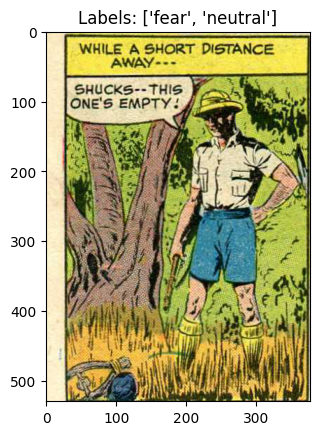

In [11]:
# Dataset items consist of:
# - image
# - dialog text
# - "narrators" text
# - labels - list of emotions

item = ds_train[3]

plt.imshow(item.image)
plt.title(f"Labels: {item.labels}")

print(f"Narrations:{item.narration_text}")
print(f"Dialog:{item.dialog_text}")


In [12]:
print(item.image_path.relative_to(DATASET_ROOT))

images\3764_5_4.jpg


Texts:['i dont like the trying to scare other wh people you s', "then er why don ' t you stop scaring me"]


Text(0.5, 1.0, "Labels: ['angry', 'disgust', 'fear', 'surprise', 'neutral']")

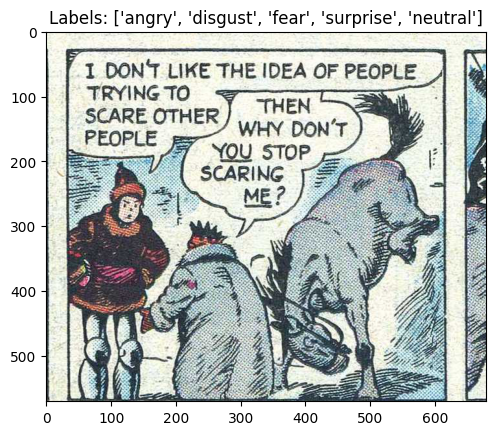

In [13]:
# There are some mistakes in texts, since they were got via OCR model 
item = ds_val[42]

plt.imshow(item.image)
print(f"Texts:{item.text}")
plt.title(f"Labels: {item.labels}")

#### Metrics

In [14]:
# dataset annotations can be converted into dense 0/1 probabilities
gt_probs = ds_val.as_label_probs()

In [15]:
keys = list(gt_probs.keys())[:5]
keys

['0_19_3.jpg',
 '1004_7_6.jpg',
 '1008_17_4.jpg',
 '1010_33_4.jpg',
 '1015_21_2.jpg']

In [16]:
gt_probs[keys[0]]

(0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0)

In [17]:
ds_val[0].label_ids

[2, 5, 6]

In [18]:
from a4_em_comics.metric import read_predicted_probs, save_predicted_probs, calculate_metric

In [19]:
# probs can be saved, read and used to measure metrics

pseudo_predicted_path = Path("gt_as_predicted.json")
save_predicted_probs(gt_probs, pseudo_predicted_path)
gt_probs2 = read_predicted_probs(pseudo_predicted_path)


In [20]:
# here the score is perfect 1 since ground truth is compared with ground truth
calculate_metric(gt_probs, gt_probs2)

1.0